In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl

mpl.rcParams['text.color'] = 'red'
mpl.rcParams['xtick.color'] = 'r'
mpl.rcParams['ytick.color'] = 'r'
mpl.rcParams['axes.labelcolor'] = 'red'


---
# Standard matrix multiplication, parts 1 & 2
---


In [2]:
## rules for multiplication validity

m = 4
n = 3
k = 6

# make some matrices
A = np.random.randn(m,n)
B = np.random.randn(n,k)
C = np.random.randn(m,k)

# test which multiplications are valid.
# Think of your answer first, then test.
np.matmul(A,B)
# np.matmul(A,A)
np.matmul(A.T,C)
np.matmul(B,B.T)
np.matmul(np.matrix.transpose(B),B)
# np.matmul(B,C)
# np.matmul(C,B)
# np.matmul(C.T,B)
np.matmul(C,B.T)

array([[-0.40761702, -2.67197838, -2.09119231],
       [-3.44306698, -0.08777715,  1.31554671],
       [ 1.6622383 ,  0.81321151,  0.13618439],
       [-0.74516314, -1.65172954, -1.26688967]])

---
## code challange: Matrix mul
---

In [3]:
def element_mul(a, b):
    m = np.zeros((len(a), len(b))) 
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                m[i][j] += a[i][k] * b[k][j]
    return m

In [4]:
def layer_mul(a, b):
    m = np.zeros((len(a), len(b)))
    for i in range(len(a[0])):
        m += np.outer(a[:,i], b[i, :])
    return m

In [5]:
a = np.array([[1, 2], 
              [3, 4]])
b = np.array([[3, 5], 
              [5, 6]])

In [6]:
layer_mul(a, b)

array([[13., 17.],
       [29., 39.]])

In [7]:
element_mul(a, b)

array([[13., 17.],
       [29., 39.]])

In [8]:
x = [[1, 2]]
y = [[1,2],[2 ,4]]
np.zeros((len(x), len(y)))

array([[0., 0.]])

---
# Order-of-operations on matrices
---


In [9]:
n = 5

L = np.random.randn(n, n)
I = np.random.randn(n, n)
V = np.random.randn(n, n)
E = np.random.randn(n, n)

res1 = np.transpose( L @ I @ V @ E )
res2 = E.T @ V.T @ I.T @ L.T

# test equality by subtracting (ignore possible computer rounding errors)
print(res1 - res2)

[[-4.44089210e-16 -1.66533454e-16  0.00000000e+00 -1.77635684e-15
   1.77635684e-15]
 [ 4.44089210e-16  2.22044605e-15  0.00000000e+00 -8.88178420e-16
  -3.55271368e-15]
 [ 0.00000000e+00 -8.88178420e-16 -1.77635684e-15 -1.77635684e-15
  -1.77635684e-15]
 [ 8.88178420e-16  1.77635684e-15  3.55271368e-15  0.00000000e+00
  -7.10542736e-15]
 [ 2.22044605e-16  4.44089210e-16  2.22044605e-16  2.22044605e-16
   0.00000000e+00]]


---
# Matrix-vector multiplication
---

In [10]:
m = 4

# non symmetric matrix
N = np.random.randint(-10, 11, (m, m))

# Scaled symmertric matrix
S = np.round(N.T * N / m**2)

w = np.array([-1, 0, 1, 2])

## With symmetric matrix ##
print(S @ w)
print(' ')
print(w @ S)
print(' ')
print(S.T @ w)
print(' ')
print(w @ S.T)
print(' ')
print(w.T @ S.T)
print(' ')
print(w.T @ S)

[ 9. -3.  0.  6.]
 
[ 9. -3.  0.  6.]
 
[ 9. -3.  0.  6.]
 
[ 9. -3.  0.  6.]
 
[ 9. -3.  0.  6.]
 
[ 9. -3.  0.  6.]


In [11]:
w.shape, S.shape

((4,), (4, 4))

In [12]:
np.dot(w, S)

array([ 9., -3.,  0.,  6.])

In [13]:
# With non symmetric matrix
# with nonsymmetric matrix
print( N@w )     # 1
print( N.T@w )   # 2
print( w@N )     # 3
print( w.T@N.T ) # 4
print( w.T@N )   # 5

[-24  16 -11  28]
[-18  -2  -9  30]
[-18  -2  -9  30]
[-24  16 -11  28]
[-18  -2  -9  30]



---
# 2D transformation matrices
---


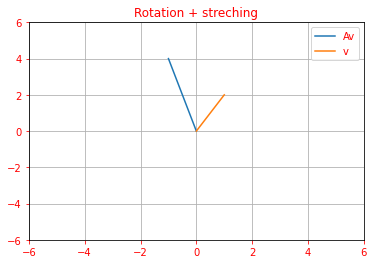

In [14]:
v = np.array([1, 2])
A = np.array([
    [1, -1],
    [2, 1]
])

w = A @ np.transpose(v)

plt.plot([0, w[0]], [0, w[1]], label='Av')
plt.plot([0, v[0]], [0, v[1]], label='v')
plt.title('Rotation + streching')
plt.axis((-6, 6, -6, 6))
plt.legend()
plt.grid()
plt.show()

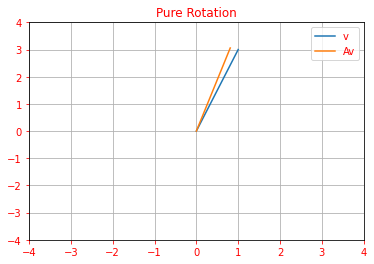

In [15]:
# theta
theta = np.pi/50

# Rotation matrix
A = np.array([[math.cos(theta), -math.sin(theta)], 
              [math.sin(theta), math.cos(theta)]])

# vetor
v = np.array([1, 3])

w = A @ np.transpose(v)

plt.plot([0, v[0]], [0, v[1]], label='v')
plt.plot([0, w[0]], [0, w[1]], label='Av')

plt.axis((-4, 4, -4, 4))

plt.title('Pure Rotation')
plt.grid()
plt.legend()
plt.show()

---
### Code challange: pure and impure rotation matrices
---

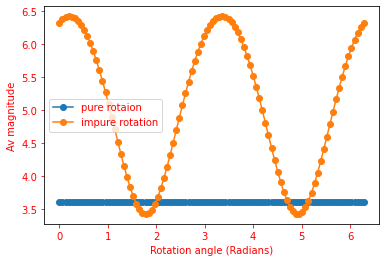

In [16]:
thetas = np.linspace(0, 2*np.pi, 100)
vecmags = np.zeros((len(thetas), 2))
v = np.array([3, -2])

for i, th in enumerate(thetas):
    # pure matrix
    A1 = np.array([[np.cos(th), -np.sin(th)], 
                   [ np.sin(th), np.cos(th)]])
    # Impure matrix
    A2 = np.array([[2*math.cos(th), -math.sin(th)], 
                   [math.sin(th), math.cos(th)]])
    
    vecmags[i, 0] = np.linalg.norm(A1 @ v.T)
    vecmags[i, 1] = np.linalg.norm(A2 @ v.T)


plt.plot(thetas, vecmags, 'o-')
plt.xlabel('Rotation angle (Radians)')
plt.ylabel('Av magnitude')
plt.legend(['pure rotaion', 'impure rotation'])
plt.show()

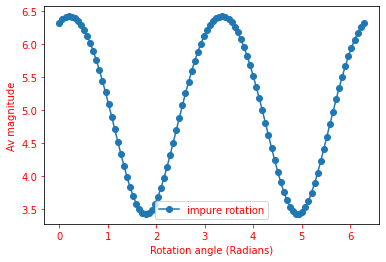

In [17]:
### Impure rotation ###
plt.plot(thetas, vecmags[:, 1], 'o-')
plt.xlabel('Rotation angle (Radians)')
plt.ylabel('Av magnitude')
plt.legend(['impure rotation'])
plt.show()

In [18]:
print(f"{'-' * 10} Magnitudes {'-' * 10}")
print(vecmags[::-8])
print(f"{'-' * 10} Thetas {'-' * 10}")
print(thetas[::-4])

---------- Magnitudes ----------
[[3.60555128 6.32455532]
 [3.60555128 5.34033625]
 [3.60555128 3.88961927]
 [3.60555128 3.53423157]
 [3.60555128 4.80612529]
 [3.60555128 6.07641762]
 [3.60555128 6.39464971]
 [3.60555128 5.59037806]
 [3.60555128 4.13757786]
 [3.60555128 3.44331955]
 [3.60555128 4.52101138]
 [3.60555128 5.89517573]
 [3.60555128 6.42362373]]
---------- Thetas ----------
[6.28318531 6.02931923 5.77545316 5.52158709 5.26772102 5.01385494
 4.75998887 4.5061228  4.25225672 3.99839065 3.74452458 3.4906585
 3.23679243 2.98292636 2.72906028 2.47519421 2.22132814 1.96746207
 1.71359599 1.45972992 1.20586385 0.95199777 0.6981317  0.44426563
 0.19039955]


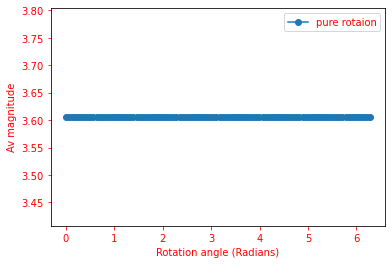

In [19]:
### Pure rotation ###
plt.plot(thetas, vecmags[:, 0], 'o-')
plt.xlabel('Rotation angle (Radians)')
plt.ylabel('Av magnitude')
plt.legend(['pure rotaion'])
plt.show()

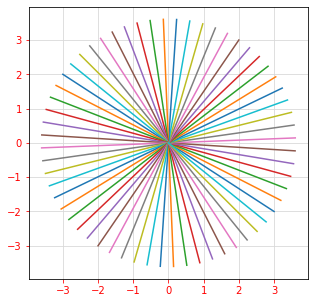

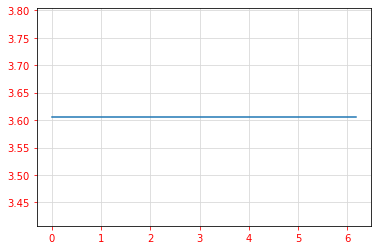

In [20]:
pureThetas = []
pureMagnitudes = []
 
for x in range(0, 60, 1):
    
    v = np.array([3, -2])
    theta = x * 0.10471975511966
    pureThetas.append(theta)
    
    A = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])
    
    w = np.matmul(A,v)
    mag = np.linalg.norm(w)
    pureMagnitudes.append(mag)
    
    plt.figure(1, figsize=(5,5))
    plt.plot([0, w[0]], [0, w[1]])
    plt.grid(b=True, color='#D8D8D8')
 
plt.figure(2)
plt.plot(pureThetas, pureMagnitudes)
plt.grid(b=True, color='#D8D8D8')

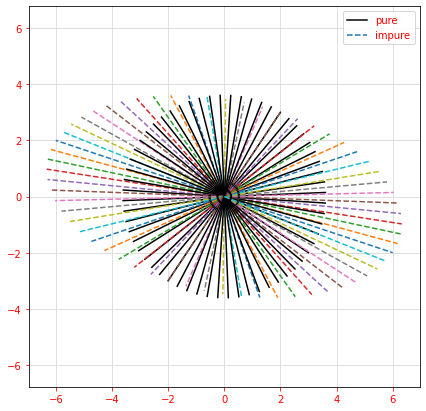

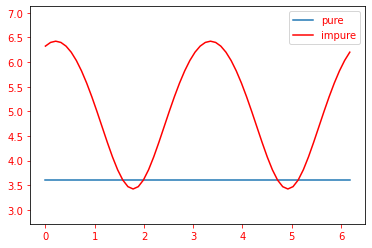

In [21]:
Theta = []
Magnitudes = []
Magnitudes2=[]
v = np.array([3, -2])
 
for x in range(0, 60):
    thetas = x * 2*np.pi/60
    Theta.append(thetas)
    
    A1 = np.array([[np.cos(thetas), -np.sin(thetas)], 
                  [np.sin(thetas), np.cos(thetas)]])
    A2 = np.array([[2*np.cos(thetas), -np.sin(thetas)], 
                  [np.sin(thetas), np.cos(thetas)]])
    
    vec1 = np.matmul(A1,v)
    vec2 = np.matmul(A2,v)
    Magnitudes.append(np.linalg.norm(vec1))
    Magnitudes2.append(np.linalg.norm(vec2))
    
    plt.figure(1, figsize=(7,7))
    plt.axis('equal')
    plt.plot([0, vec1[0]], [0, vec1[1]],'k')
    plt.legend(["pure", 'impure'])
    plt.plot([0, vec2[0]], [0, vec2[1]],linestyle='dashed')
    plt.grid(b=True, color='#D8D8D8')
 
plt.figure(2)
plt.figure(2, figsize=(7,7))
plt.axis('equal')
 
plt.plot(Theta, Magnitudes)
plt.plot(Theta, Magnitudes2,'r')
plt.legend(["pure", 'impure'])

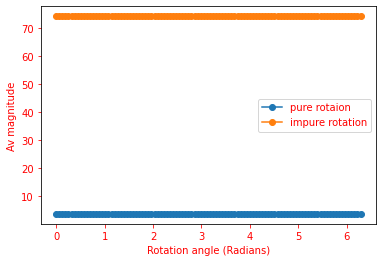

In [22]:
thetas = np.linspace(0, 2*np.pi, 100)
vecmags = np.zeros((len(thetas), 2))
v = np.array([3, -2])

for i, th in enumerate(thetas):
    # pure matrix
    A1 = np.array([[1, 0], 
                   [ 0, 1]])
    # Impure matrix
    A2 = np.array([[3, 2], 
                   [-2, 34]])
    
    vecmags[i, 0] = np.linalg.norm(A1 @ v.T)
    vecmags[i, 1] = np.linalg.norm(A2 @ v.T)


plt.plot(thetas, vecmags, 'o-')
plt.xlabel('Rotation angle (Radians)')
plt.ylabel('Av magnitude')
plt.legend(['pure rotaion', 'impure rotation'])
plt.show()

---
### Code challange: Geometric multiplication via matrix multiplication
---

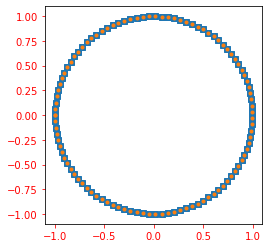

In [23]:
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# Transformation matrix
T = np.eye(2)
xynew = xy @ T

plt.plot(xynew[:,0], xynew[:, 1], 's')
plt.plot(xy[:,0], xy[:, 1], '.')
# Here we can see that new transformed vectors just override the old vector
# Because we are using identity matrix
plt.axis('square')
plt.show()

#### Using Rank 2 matrix For Transformation

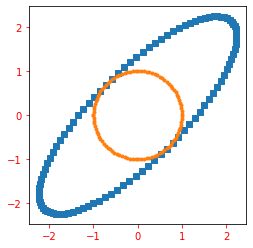

In [24]:
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# Transformation matrix
T = np.array([[1, 2], [2, 1]])
xynew = xy @ T

plt.plot(xynew[:,0], xynew[:, 1], 's')
plt.plot(xy[:,0], xy[:, 1], '.')
# Here we can see that T is a Rank 2 matrix
plt.axis('square')
plt.show()

#### Using Rank 0 matrix or Zero matrix For Transformation

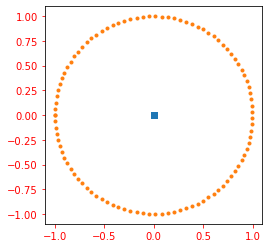

In [25]:
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# Transformation matrix
T = np.zeros((2, 2))
xynew = xy @ T

plt.plot(xynew[:,0], xynew[:, 1], 's')
plt.plot(xy[:,0], xy[:, 1], '.')
plt.axis('square')
plt.show()

#### Using Dependent matrix For Transformation

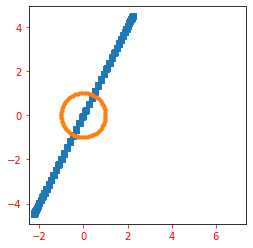

In [26]:
x = np.linspace(-np.pi, np.pi, 100)
xy = np.vstack((np.cos(x), np.sin(x))).T

# Transformation matrix
T = np.array([[1, 2], [2, 4]])
xynew = xy @ T

plt.plot(xynew[:,0], xynew[:, 1], 's')
plt.plot(xy[:,0], xy[:, 1], '.')
plt.axis('square')
plt.show()

---
# Additive and multiplicative matrix identities
---

In [27]:
# size of matrices
n = 4

# create the matrices
A = np.round( 10*np.random.randn(n,n) )
I = np.eye(n)
Z = np.zeros((n,n))

# test both identities
np.array_equal( A@I , A   )
np.array_equal( A   , A@I )
np.array_equal( A   , A+I )

np.array_equal( A   , A+I )
np.array_equal( A+Z , A@I )

True


---
# Additive and multiplicative symmetric matrices
---


In [28]:
# Symmetric matrix via additive method
m = 4
n = 4
A = np.random.randn(m, n)


S = (A + A.T)/2

# Symmetric matrix
S-S.T

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
# Symmetric matrix via multiplicative method
m, n = 3, 4
A = np.random.randn(m, n)

# create matrices
A   = np.random.randn(m,n)
AtA = A.T@A
AAt = A@A.T

# first, show that they are square
print( AtA.shape )
print( AAt.shape )


# next, show that they are symmetric
print( AtA - AtA.T )
print( AAt - AAt.T )

(4, 4)
(3, 3)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]



---
# Element-wise (Hadamard) multiplication
---

In [30]:
m, n = 4, 5
A = np.random.randn(m, n)
B = np.random.randn(m, n)

# Both are same S1 and S2
S1 = A * B
S2 = np.multiply(A, B)

print(S1 - S2)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


---
### code challange: symmetry of combined symmetric matrices
---

In [31]:
m, n = 4, 4

# fucntion to check whether a matrix is symmetric or not
def is_symmetric(mat) -> bool:
    for i, _ in enumerate(mat):
        for j, _ in enumerate(mat):
            if mat[i][j] != mat[j][i]:
                return False
    return True

# Create 2 matrices
A = np.random.randn(m, n)
B = np.random.randn(m, n)

# make them symmetric matrices
AtA = (A + A.T)/2
BtB = (B + B.T)/2

# sum
S = AtA + BtB

# cross product
C = AtA @ BtB

# Hadamard multiplication
H = AtA * BtB

print(f'A + B : {is_symmetric(S)}')
print(f'A * B : {is_symmetric(H)}')
print(f'A @ B : {is_symmetric(C)}')  

A + B : True
A * B : True
A @ B : False


In [42]:
from sympy import *
a,b,c,d,e,f,g,h,k,l,m,n,o,p,q,r,s,t,u = \
symbols('a b c d e f g h k l m n o p q r s t u', real=True)
# symmetric and constant-diagonal matrices
A = Matrix([ [a,b,c,d],
             [b,a,e,f],
             [c,e,a,h],
             [d,f,h,a]   ])

B = Matrix([ [l,m,n,o],
             [m,l,q,r],
             [n,q,l,t],
             [o,r,t,l]   ])

print(A - A.T)
print(B - B.T)

Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])
Matrix([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]])


In [43]:
for i in range(0,np.size(A,0)):
    print( A[i,i] ,end=' ')

print(' ')

for i in range(0,np.size(B,0)):
    print( B[i,i], end=' ' )

a a a a  
l l l l 

In [44]:
# nice printing in sympy
init_printing()

# but AB neq (AB)'
A@B - (A@B).T

⎡          0             c⋅q + d⋅r - e⋅n - f⋅o   b⋅q + d⋅t - e⋅m - h⋅o   b⋅r +
⎢                                                                             
⎢-c⋅q - d⋅r + e⋅n + f⋅o            0             b⋅n - c⋅m + f⋅t - h⋅r   b⋅o -
⎢                                                                             
⎢-b⋅q - d⋅t + e⋅m + h⋅o  -b⋅n + c⋅m - f⋅t + h⋅r            0             c⋅o -
⎢                                                                             
⎣-b⋅r - c⋅t + f⋅m + h⋅n  -b⋅o + d⋅m - e⋅t + h⋅q  -c⋅o + d⋅n - e⋅r + f⋅q       

 c⋅t - f⋅m - h⋅n⎤
                ⎥
 d⋅m + e⋅t - h⋅q⎥
                ⎥
 d⋅n + e⋅r - f⋅q⎥
                ⎥
     0          ⎦

In [45]:
# maybe for a submatrix?
n = 3
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

⎡    0       c⋅q - e⋅n   b⋅q - e⋅m⎤
⎢                                 ⎥
⎢-c⋅q + e⋅n      0       b⋅n - c⋅m⎥
⎢                                 ⎥
⎣-b⋅q + e⋅m  -b⋅n + c⋅m      0    ⎦

In [46]:
A1 @ B1

⎡a⋅l + b⋅m + c⋅n  a⋅m + b⋅l + c⋅q  a⋅n + b⋅q + c⋅l⎤
⎢                                                 ⎥
⎢a⋅m + b⋅l + e⋅n  a⋅l + b⋅m + e⋅q  a⋅q + b⋅n + e⋅l⎥
⎢                                                 ⎥
⎣a⋅n + c⋅l + e⋅m  a⋅q + c⋅m + e⋅l  a⋅l + c⋅n + e⋅q⎦

In [47]:
# But for 2x2 Symmetric matrix with constant diagonal cross product is Zero matrix
n = 2
A1 = A[ 0:n,0:n ]
B1 = B[ 0:n,0:n ]

A1@B1 - (A1@B1).T

⎡0  0⎤
⎢    ⎥
⎣0  0⎦

---
#### Code challange: Standard and Hadamard multiplication for Diagonal and Square matrix
---

In [48]:
m = 4

## Create 2 matrix ##
# Square matrix
A = np.round(20 * np.random.randn(m, m))
# Diagonal matrix
B = np.diag([1, 2, 3, 4])

## Hadamard multiplication ##
AH = A * A
BH = B * B

## Cross product
AC = A @ A
BC = B @ B

In [49]:
AH - AC

array([[-141.,  696.,  207., -333.],
       [1515., -258.,  453.,  161.],
       [-733.,  944.,  -16.,   -9.],
       [-771.,  819.,  779., -733.]])

In [50]:
# Cross product and hadamard mul gives same result
BH - BC

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

---
#### Code Challange : Fourier transform via matrix multiplication
---

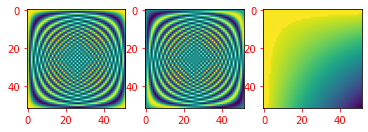

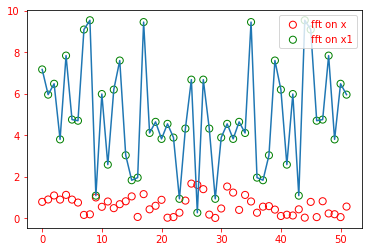

In [51]:
n = 52
F = np.zeros((n, n), dtype="complex")
w = np.exp(-2*np.pi*np.complex(0,1)/n)
 
for i in range(n):
    for k in range(n):
        m = (i)*(k) # (j - 1)*(k - 1), but python is 0 indexed
        F[i, k] = w**m
 
fig, ax = plt.subplots(1,3)
ax[0].imshow(np.real(F)); ax[1].imshow(np.imag(F)); ax[2].imshow(np.abs(F))          
 
x = np.random.randn(n, 1)
x1 = np.matmul(F, x)
 
from scipy.fft import fft
x2 = fft(x)
 
fig, ax2 = plt.subplots(1,1)
ax2.plot(range(n), np.abs(x1))
ax2.scatter(range(n), np.abs(x2), s=50, marker='o', facecolors='none', edgecolors='r', label='fft on x')
ax2.scatter(range(n), np.abs(fft(x1)), s=50, marker='o', facecolors='none', edgecolors='g', label='fft on x1')
ax2.legend(loc=1)
plt.show()


---
# Frobenius dot-product
---


In [52]:
m, n = 9, 4

A = np.random.randn(m, n)
B = np.random.randn(m, n)

# vectorizing the matrix
Av = np.reshape(A, m*n, order='F')
Bv = np.reshape(B, m*n, order='F')

# computing dot product of vectorized matrices
frob_dp1= np.dot(Av, Bv)

# Using Trace for Forbenius dot product
frob_dp2 = np.trace(A.T @ B)

# Applying hadamard mul and summing all the elements
frob_dp3 = np.sum(A * B)

In [53]:
# All are same except some decimal places
frob_dp1, frob_dp2, frob_dp3

In [54]:
# matrix norm
Anorm  = np.linalg.norm(A, 'fro')
Anorm2 = np.sqrt( np.trace( A.T@A ) )
Anorm, Anorm2

---
# Matrix Norms 
---

In [57]:
# Create a matrix
A = np.array([ [1,2,3], [4,5,6], [7,7,9] ])

# Forbenius norm
normForb = np.linalg.norm(A, 'fro')

# induced norm
normInduced = np.linalg.norm(A, 2)
# note: computed as below
lamb = np.sqrt(np.max(np.linalg.eig(A.T @ A)[0]))

# Schatten p-norm
p = 1
s = np.linalg.svd(A)[1] # get singular values
normShatten = np.sum(s**p)**(1/p)

print(normForb, normInduced, normShatten)

16.431676725154983 16.392007827749776 17.818241836274783


---
### Code challange: self adjoint operator
---

In [62]:
# Symmetric matrix
A = np.array([[9, 2],
              [2, 6]])
v = np.array([4, 5])
w = np.array([8, 3])

np.dot(A@v, w) - np.dot(v, A@w)

0

In [59]:
A@v

array([46, 38])

In [60]:
A@w

array([78, 34])

In [61]:
np.dot(A@v, w)

482